In [8]:
# Running it two times removes all the warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd
from virgodb import VirgoDB
vdb = VirgoDB("giorgio",password="BN401kmd")
import timeit

# WRITE

# Snapnum=47 ==>  z=0.46 ( random$<0.1$ ) --> filename: z_47_rand10.txt

In [5]:
query =  'SELECT des.mag_V_ext as d_mag_V_ext, des.SDSS_u_ext as d_SDSS_u_ext, prog.mag_V_ext as p_mag_V_ext, prog.SDSS_u_ext as p_SDSS_u_ext ,prog.stellarmass as p_stellarmass,des.stellarmass as d_stellarmass,prog.redshift as p_redshift, des.mdhalo as d_mdhalo, prog.mdhalo as p_mdhalo ' 
query += 'FROM Gonzalez2014a..mr7 as prog, Gonzalez2014a..mr7 as des '   
query += 'WHERE des.mainleafid = prog.galaxyid '
query += 'AND des.snapnum=47 and des.random<0.1 '
z_47_rand10 = vdb.execute_query(query)

In [23]:
#save in a txt file since it is quite a long query
#pd.DataFrame.to_csv(z_47_rand10)
h = 'd_mag_V_ext \t d_SDSS_u_ext \t p_mag_V_ext \t p_SDSS_u_ext \t p_stellarmass \t d_stellarmass \t p_redshift \t d_mdhalo \t p_mdhalo '
np.savetxt("../data/z_47_rand10.txt",z_47_rand10.T, header=h)

In [2]:
from fase.fileio import Table

In [3]:
PF = Table("../data/z_47_rand10.txt")

In [4]:
PF.getColNames()

array(['d_mag_V_ext', 'd_SDSS_u_ext', 'p_mag_V_ext', 'p_SDSS_u_ext',
       'p_stellarmass', 'd_stellarmass', 'p_redshift', 'd_mdhalo',
       'p_mdhalo'], dtype='|S13')

In [5]:
PF.getCol('p_stellarmass')

array([1.43959522e-04, 1.58484501e-04, 4.54598805e-04, ...,
       1.24242879e-05, 1.66755854e-05, 5.08670928e-05])

In [34]:
weird_prog = np.where(PF.getCol('p_mag_V_ext')>-14)
not_weird_prog = np.where(PF.getCol('p_mag_V_ext')<-14)


/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


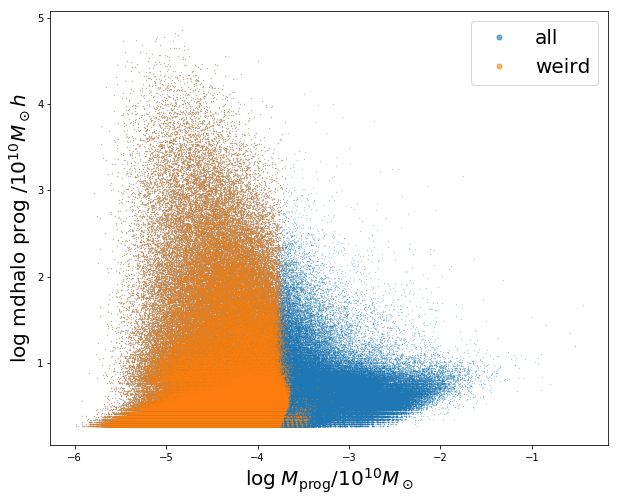

In [42]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(PF.getCol('p_stellarmass')),np.log10(PF.getCol('p_mdhalo')),".",markersize=0.5,alpha=0.6,label='all')
plt.plot(np.log10(PF.getCol('p_stellarmass')[weird_prog]),np.log10(PF.getCol('p_mdhalo')[weird_prog]),".",markersize=0.5,alpha=0.6,label='weird')
plt.xlabel(r'$\log\; M_{\rm{prog}}/10^{10} M_\odot$')
plt.ylabel('log mdhalo prog $/10^{10} M_\odot h$')
plt.legend(markerscale=20)
plt.savefig('../plots/005/mass_halomass_prog_weird.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


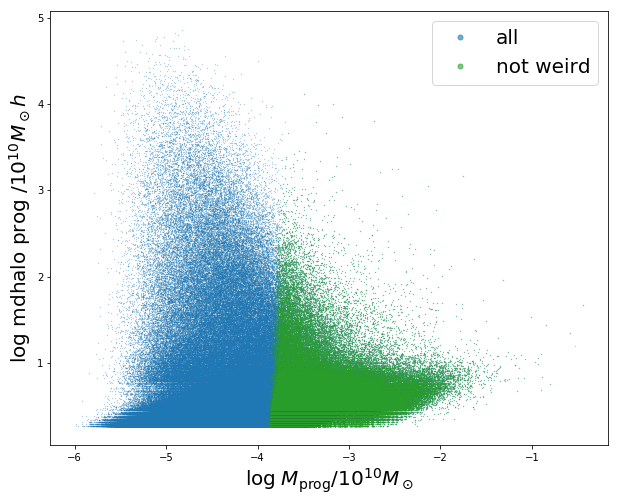

In [43]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(PF.getCol('p_stellarmass')),np.log10(PF.getCol('p_mdhalo')),".",markersize=0.5,alpha=0.6,label='all')
plt.plot(np.log10(PF.getCol('p_stellarmass')[not_weird_prog]),np.log10(PF.getCol('p_mdhalo')[not_weird_prog]),".",markersize=0.5,alpha=0.6,label='not weird',c='C2')
plt.xlabel(r'$\log\; M_{\rm{prog}}/10^{10} M_\odot$')
plt.ylabel('log mdhalo prog $/10^{10} M_\odot h$')
plt.legend(markerscale=20)
plt.savefig('../plots/005/mass_halomass_prog_not_weird.png')
plt.show()

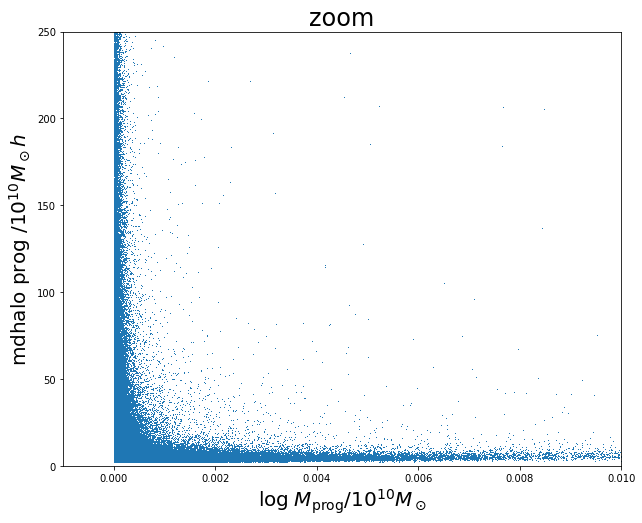

In [25]:
#not needed anymore, I did dthis plot when I did not realise that the masses are notstored as logarithmic
plt.figure(figsize=(10,8))
plt.plot(PF.getCol('p_stellarmass'),PF.getCol('p_mdhalo'),",")
plt.xlim(-0.001,0.01)
plt.ylim(-0.01,250)
plt.xlabel(r'$\log\; M_{\rm{prog}}/10^{10} M_\odot$')
plt.ylabel('mdhalo prog $/10^{10} M_\odot h$')
plt.title('zoom')
plt.savefig('../plots/005/mass_halomass_prog_zoom.png')
plt.show()

## descendant

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


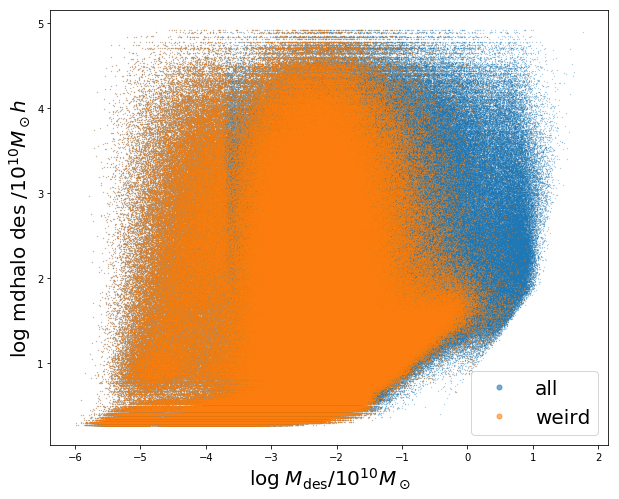

In [47]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(PF.getCol('d_stellarmass')),np.log10(PF.getCol('d_mdhalo')),".",markersize=0.5,alpha=0.6,label='all')
plt.plot(np.log10(PF.getCol('d_stellarmass')[weird_prog]),np.log10(PF.getCol('d_mdhalo')[weird_prog]),".",markersize=0.5,alpha=0.6,c='C1',label='weird')
plt.xlabel(r'$\log\; M_{\rm{des}}/10^{10} M_\odot$')
plt.ylabel('log mdhalo des $/10^{10} M_\odot h$')
plt.legend(markerscale=20)
plt.savefig('../plots/005/mass_halomass_des_weird.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


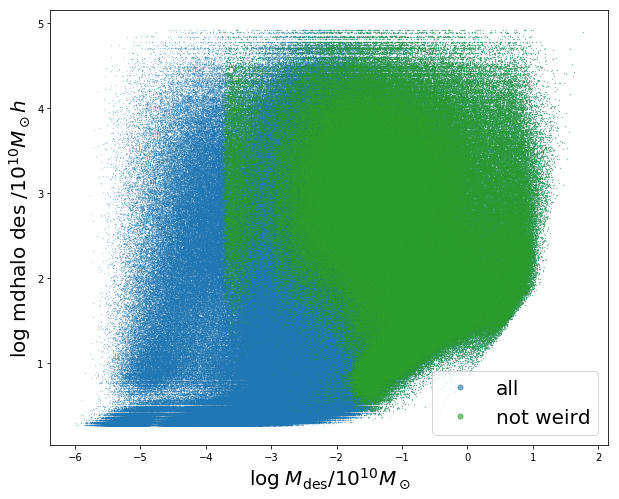

In [48]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(PF.getCol('d_stellarmass')),np.log10(PF.getCol('d_mdhalo')),".",markersize=0.5,alpha=0.6,label='all')
plt.plot(np.log10(PF.getCol('d_stellarmass')[not_weird_prog]),np.log10(PF.getCol('d_mdhalo')[not_weird_prog]),".",markersize=0.5,alpha=0.6,c='C2',label='not weird')
plt.xlabel(r'$\log\; M_{\rm{des}}/10^{10} M_\odot$')
plt.ylabel('log mdhalo des $/10^{10} M_\odot h$')
plt.legend(markerscale=20)
plt.savefig('../plots/005/mass_halomass_des_not_weird.png')
plt.show()

# READ

In [36]:
df = pd.read_table("../data/z_47_rand10.txt",encoding='utf-8',header=0,delimiter='\t')

In [34]:
df

,# d_mag_V_ext,d_SDSS_u_ext,p_mag_V_ext,p_SDSS_u_ext,p_stellarmass,d_stellarmass,p_redshift,d_mdhalo,p_mdhalo
0,-1.749634361267089844e+01 -1.65337829589843750...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.507263183593750000e+01 -1.36388101577758789...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.847604560852050781e+01 -1.66762008666992187...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.538253307342529297e+01 -1.38879289627075195...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.265750408172607422e+01 -1.13163490295410156...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1.503402900695800781e+01 -1.35481967926025390...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.432301712036132812e+01 -1.31252231597900390...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1.808881568908691406e+01 -1.71191291809082031...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.590917015075683594e+01 -1.50229167938232421...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.458098888397216797e+01 -1.37390766143798828...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['d_SDSS_u_ext']

KeyError: 'd_SDSS_u_ext'

In [37]:
d = np.loadtxt("../data/z_47_rand10.txt")

In [41]:
d[0]

array([-1.74963436e+01, -1.65337830e+01, -1.37911882e+01, -1.37916241e+01,
        1.43959522e-04,  4.04535681e-02,  3.30809975e+00,  8.05299377e+00,
        2.71554422e+00])